<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#E13213;overflow:hidden;font-weight:800">Healthcare Dataset</div>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/healthcare-dataset/healthcare_dataset.csv


## <b><div style='padding:15px;background-color:#E13213;color:white;border-radius:2px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>


**Dataset Information:**

Each column provides specific information about the patient, their admission, and the healthcare services provided, making this dataset suitable for various data analysis and modeling tasks in the healthcare domain. Here's a brief explanation of each column in the dataset -

**Name:** This column represents the name of the patient associated with the healthcare record.

**Age:** The age of the patient at the time of admission, expressed in years.

**Gender:** Indicates the gender of the patient, either "Male" or "Female."

**Blood Type:** The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).

**Medical Condition:** This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.

**Date of Admission:** The date on which the patient was admitted to the healthcare facility.

**Doctor:** The name of the doctor responsible for the patient's care during their admission.

**Hospital:** Identifies the healthcare facility or hospital where the patient was admitted.

**Insurance Provider:** This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."

**Billing Amount:** The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.

**Room Number:** The room number where the patient was accommodated during their admission.

**Admission Type:** Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.

**Discharge Date:** The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.

**Medication:** Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."

**Test Results:** Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

## <b><div style='padding:15px;background-color:#E13213;color:white;border-radius:2px;font-size:110%;text-align: center'>2  |  Importing Libraries</div></b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio
import sklearn
import plotly.express as ex

import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#E13213;color:white;border-radius:2px;font-size:110%;text-align: center'>3  |  Dataset</div></b>

In [3]:
df = pd.read_csv("/kaggle/input/healthcare-dataset/healthcare_dataset.csv")
df.head().T

,0,1,2,3,4
Name,Tiffany Ramirez,Ruben Burns,Chad Byrd,Antonio Frederick,Mrs. Brandy Flowers
Age,81,35,61,49,51
Gender,Female,Male,Male,Male,Male
Blood Type,O-,O+,B-,B-,O-
Medical Condition,Diabetes,Asthma,Obesity,Asthma,Arthritis
Date of Admission,2022-11-17,2023-06-01,2019-01-09,2020-05-02,2021-07-09
Doctor,Patrick Parker,Diane Jackson,Paul Baker,Brian Chandler,Dustin Griffin
Hospital,Wallace-Hamilton,"Burke, Griffin and Cooper",Walton LLC,Garcia Ltd,"Jones, Brown and Murray"
Insurance Provider,Medicare,UnitedHealthcare,Medicare,Medicare,UnitedHealthcare
Billing Amount,37490.983364,47304.064845,36874.896997,23303.322092,18086.344184


## <b><div style='padding:15px;background-color:#E13213;color:white;border-radius:2px;font-size:110%;text-align: center'>4  |  Inspecting Dataframe Structure</div></b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [5]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [6]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [7]:
df.shape

(10000, 15)

## <b><div style='padding:15px;background-color:#E13213;color:white;border-radius:2px;font-size:110%;text-align: center'>5  |  EDA</div></b>

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#E13213'> Numerical Features</span></b> 

In [8]:
# Numerical features

df.describe(exclude=['O'])

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


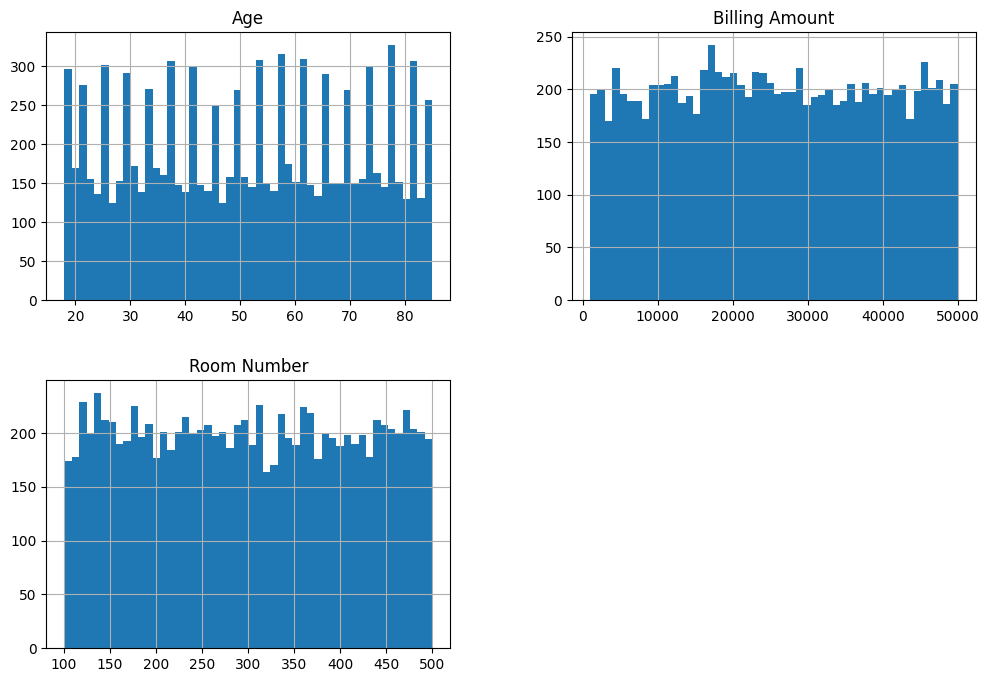

In [9]:
# Histogram

df.hist(bins=50, figsize=(12,8))
plt.show()

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#E13213'> Categorical Features</span></b> 

In [10]:
# categorical features

df.describe(include=['O'])

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,1815,9416,8639,5,3,1834,5,3
top,Michael Johnson,Female,AB-,Asthma,2019-04-12,Michael Johnson,Smith PLC,Cigna,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,5075,1275,1708,15,7,19,2040,3391,14,2079,3456


In [11]:
cols = ['Gender','Blood Type', 'Medical Condition',
        'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

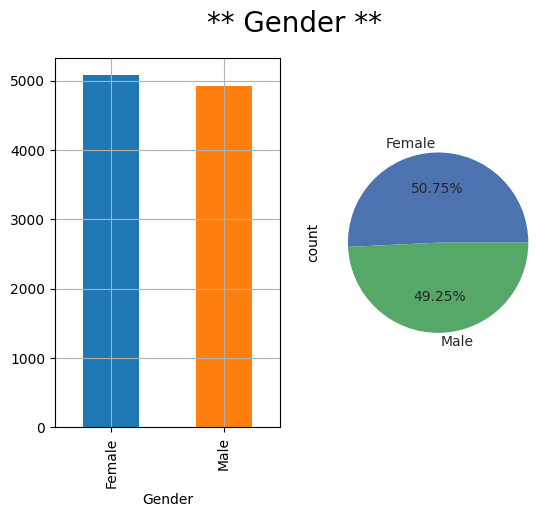

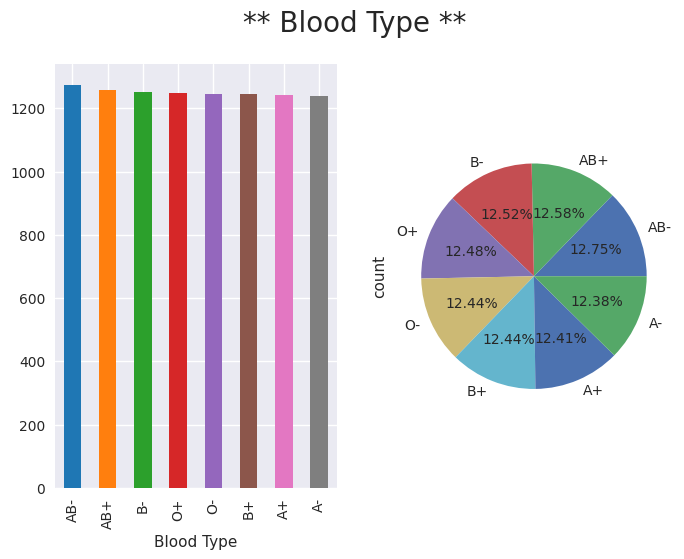

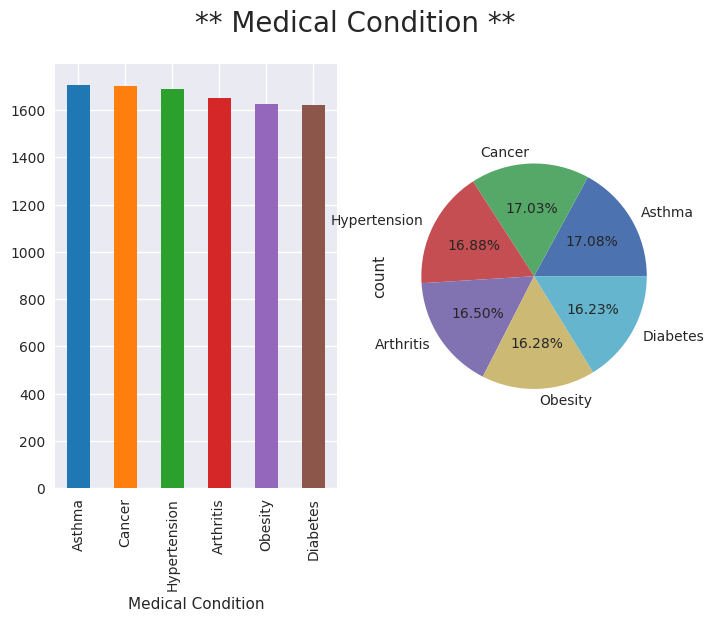

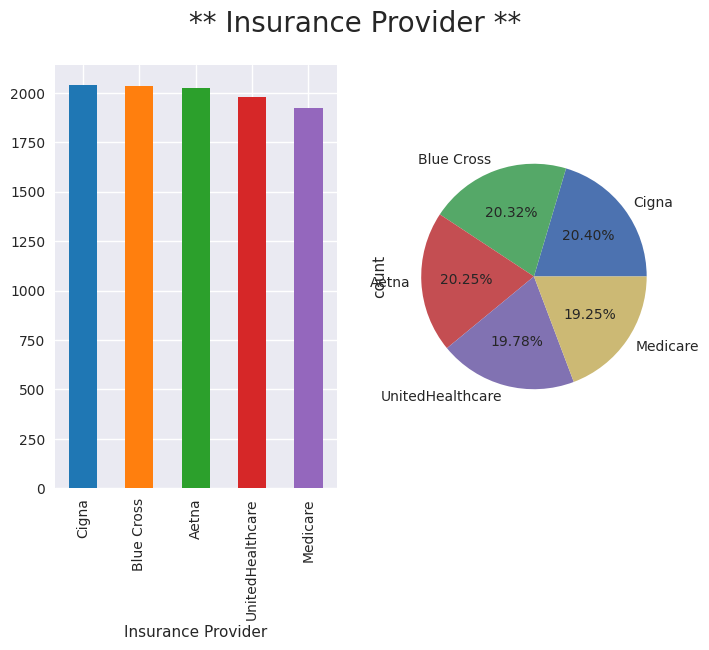

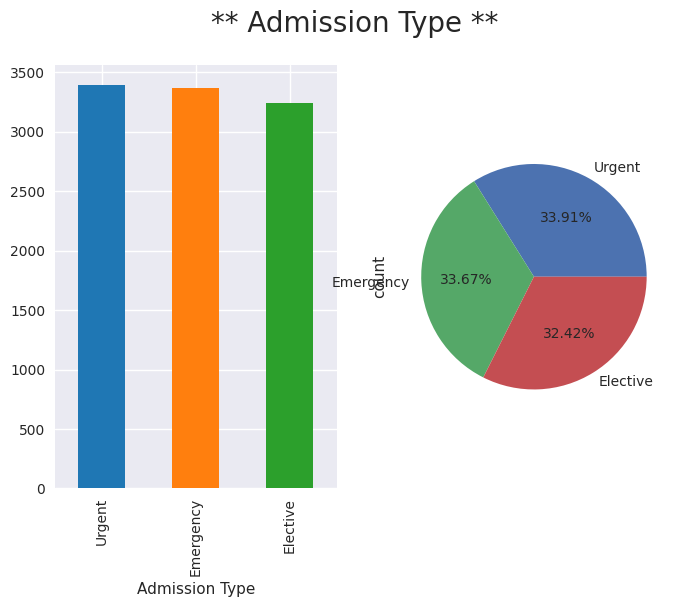

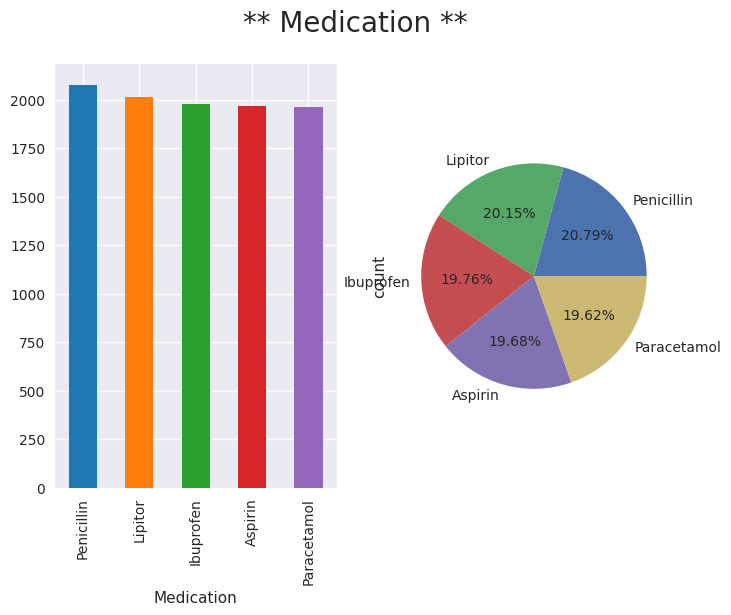

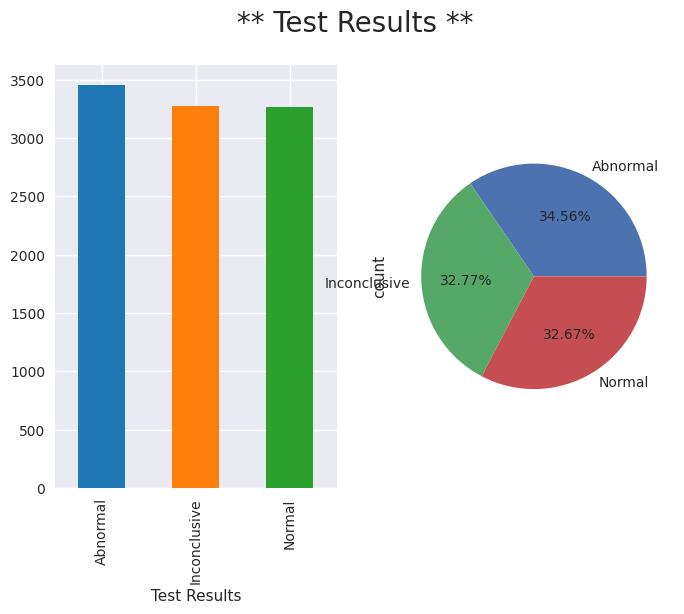

In [12]:
# Categorical Features
for i in cols:
    
    if i == 'Gender':

        fig, ax = plt.subplots(1, 2) 
        fig.suptitle('** Gender **', fontsize=20) 
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df['Gender'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df['Gender'].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()
    
    else:
        fig, ax = plt.subplots(1, 2) 
        fig.suptitle('** ' + i + ' **', fontsize=20) 
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df[i].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df[i].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()

In [13]:
cols = ['Gender','Blood Type', 'Medical Condition','Doctor',
        'Hospital', 'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

In [14]:
# Highest "Features" according to Billing Amount

for i in cols:
    
    if i == 'Gender':

        char_bar = df.groupby(['Gender'])[['Billing Amount']].sum().reset_index()
        char_bar = char_bar.sort_values(by=("Billing Amount"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top['Gender'], y=top["Billing Amount"]))

        fig.update_layout(title="Highest Gender According to " + 'Billing Amount',
                          xaxis_title='Gender',
                          yaxis_title= "Billing Amount",
                          plot_bgcolor='white', 
                          paper_bgcolor='white',  
                          font=dict(color='black'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

    else:
        char_bar = df.groupby([i])[['Billing Amount']].sum().reset_index()
        char_bar = char_bar.sort_values(by=("Billing Amount"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top[i], y=top['Billing Amount']))

        fig.update_layout(title="Highest " + i + " According to Billing Amount",
                          xaxis_title= i,
                          yaxis_title= "Billing Amount",
                          plot_bgcolor='white', 
                          paper_bgcolor='white',  
                          font=dict(color='black'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

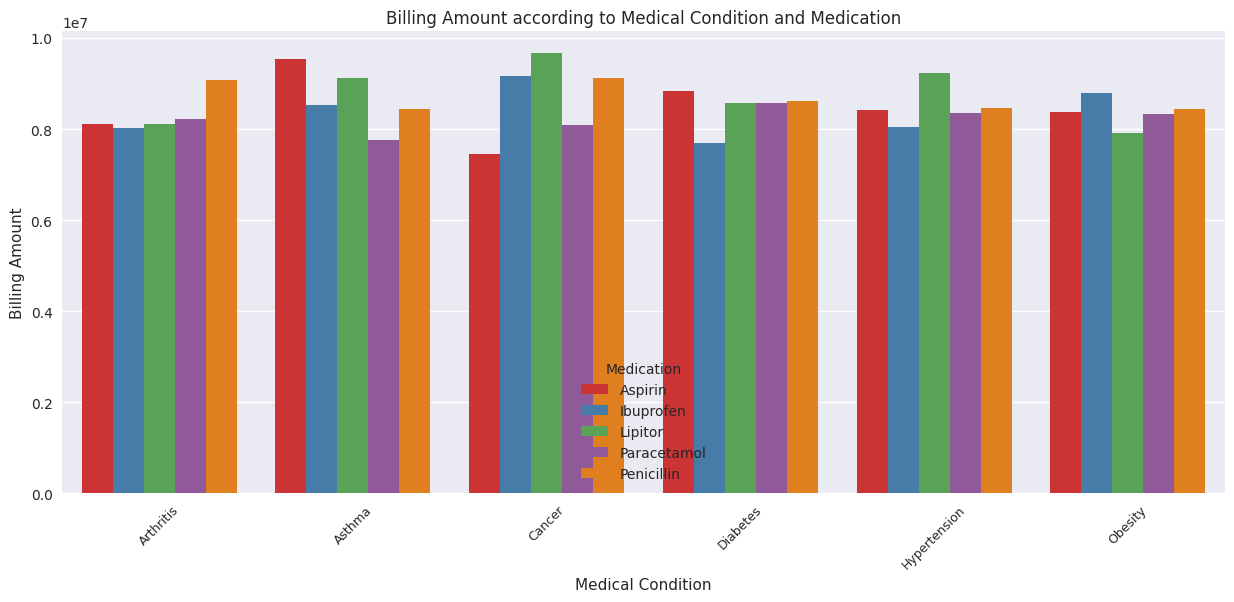

In [15]:
# Billing Amount according to Medical Condition and Medication
df_trans = df.groupby(['Medical Condition', 'Medication'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Medication'], ci=None, palette="Set1")
plt.title("Billing Amount according to Medical Condition and Medication")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45, fontsize = 9)
plt.show()

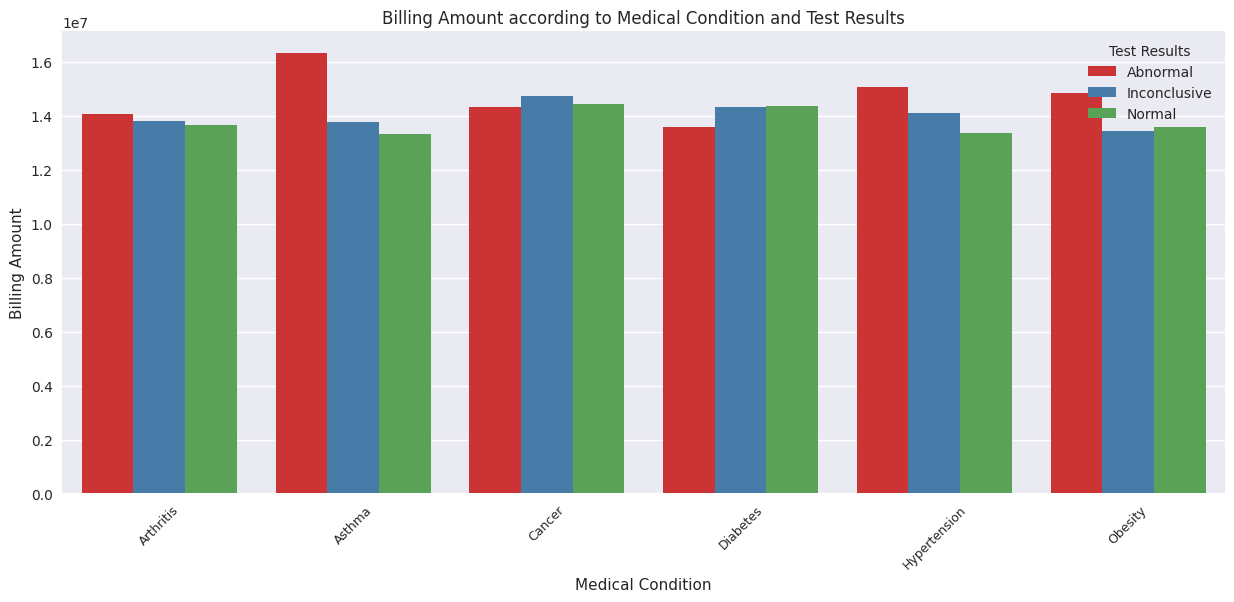

In [16]:
# Billing Amount according to Medical Condition and Test Results
df_trans = df.groupby(['Medical Condition', 'Test Results'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Test Results'], ci=None, palette="Set1")
plt.title("Billing Amount according to Medical Condition and Test Results")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45, fontsize = 9)
plt.show()

In [17]:
# Let's create a column with the number of days hospitalized

df['Date of Admission']= pd.to_datetime(df['Date of Admission'])
df['Discharge Date']= pd.to_datetime(df['Discharge Date'])
df['Days hospitalized'] = df['Discharge Date'] - df['Date of Admission']
df['Days hospitalized'] = df['Days hospitalized'].astype(int) / 86400000000000 # Converting to number of days

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days hospitalized
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,14.0
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14.0
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30.0
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1.0
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24.0


In [18]:
# Highest 'Features' according to average number of days hospitalized

for i in cols:
    
    if i == 'Gender':

        char_bar = df.groupby(['Gender'])[['Days hospitalized']].mean().reset_index()
        char_bar = char_bar.sort_values(by=("Days hospitalized"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top['Gender'], y=top["Days hospitalized"]))

        fig.update_layout(title='Highest Gender according to average number of days hospitalized',
                          xaxis_title='Gender',
                          yaxis_title= "Days hospitalized",
                          plot_bgcolor='black', 
                          paper_bgcolor='gray',  
                          font=dict(color='white'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

    else:
        char_bar = df.groupby([i])[['Days hospitalized']].mean().reset_index()
        char_bar = char_bar.sort_values(by=("Days hospitalized"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top[i], y=top['Days hospitalized']))

        fig.update_layout(title="Highest " + i + " according to average number of days hospitalized",
                          xaxis_title= i,
                          yaxis_title= "Days hospitalized",
                          plot_bgcolor='black', 
                          paper_bgcolor='gray',  
                          font=dict(color='white'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

## <b><div style='padding:15px;background-color:#E13213;color:white;border-radius:2px;font-size:110%;text-align: center'>If you liked it, please upvote. Thank you very much.</div></b>